<a href="https://colab.research.google.com/github/nandhukumar86/CapstonePneumoniaDetection/blob/main/Vani/CpstoneModelbuilding_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
TrainDir = "/content/drive/MyDrive/Content/DriveAIML/capstone/jpg_reshaped_train"
TestDir='/content/drive/MyDrive/Content/DriveAIML/capstone/jpg_reshaped_test'


In [20]:
# CNN (Convolutional Neural Network)
import pickle
import os
import numpy as np
import pandas as pd

import cv2
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
from matplotlib import pyplot as plt #Ploting charts
from glob import glob #retriving an array of files in directories
from keras.models import Sequential #for neural network models
from keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
from tensorflow.keras import models, layers, Model, losses
from keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
#from keras.utils import to_categorical #For One-hot Encoding
from keras.optimizers import Adam, SGD, RMSprop #For Optimizing the Neural Network
from keras.callbacks import EarlyStopping
import keras.utils

In [4]:
filename =  '/content/drive/MyDrive/Content/DriveAIML/capstone/RezisedLabel.pickle'
with open(filename, "rb") as input_file:
  y_train = pickle.load(input_file)

In [5]:
y_train.head(5)
y_train.size

423178

In [6]:
y_train.size

423178

In [10]:
trainimg = glob(TrainDir+"/*.jpg") #Getting all images in this folder
testimg=glob(TestDir+"/*.jpg") #

In [12]:
len(trainimg)

11740

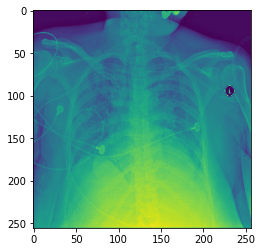

In [23]:
img = np.asarray(plt.imread(trainimg[0],format=(3,3)))
plt.imshow(img)

In [15]:
img.shape

(256, 256)

In [21]:
trandf=pd.DataFrame(trainimg)

In [24]:
# Model-CNN
modelCNN = models.Sequential() 
modelCNN.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=trandf.shape[1:])) 
modelCNN.add(layers.MaxPooling2D((2, 2))) # to downsample the feature maps
modelCNN.add(layers.Conv2D(32, (3, 3), activation='relu')) 
modelCNN.add(layers.MaxPooling2D((2, 2))) 
modelCNN.add(layers.Conv2D(8, (3, 3), activation='relu'))
modelCNN.add(layers.MaxPooling2D((2, 2))) 
modelCNN.add(layers.Conv2D(32, (3, 3), activation='relu'))
modelCNN.add(layers.MaxPooling2D((2, 2))) 
modelCNN.add(layers.Flatten()) 
modelCNN.add(layers.Dense(2, activation='relu'))
modelCNN.add(layers.Dense(1, activation='softmax'))
modelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

modelCNN_A = modelCNN
modelCNN_A.summary()

ValueError: ignored

In [ ]:
#Viewing the summary of the model
model.summary()

ValueError: ignored

In [ ]:
#Training the neural net


optimizer = Adam(lr = 0.0001)
early_stopping_monitor = EarlyStopping(patience = 3, monitor = "val_acc", mode="max", verbose = 2)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
history = model.fit(epochs=5, callbacks=[early_stopping_monitor],  shuffle=True, validation_data=test_x, steps_per_epoch=50, validation_steps=10,verbose=2)
prediction = model.predict_generator(generator=trainimg, verbose=2, steps=100)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


ValueError: ignored